## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [65]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    feat=[x] # 一次项
    for i in range(2,feature_num+1): # 高次项
        feat.append(x**i)
    #==========
    print(np.array(feat).shape)
    ret=np.concatenate(feat,axis=1)
    print(ret.shape)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    centers=np.linspace(0,25,feature_num)
    width=1.0*(centers[1]-centers[0])
    x=np.expand_dims(x,axis=1)
    x=np.concatenate([x]*feature_num,axis=1)
    out=(x-centers)/width
    #==========
    ret = np.exp(-0.5*out**2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)
$$ w^{*}= (x^{T}*x)*（x^{T}*y） $$

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [59]:
def main(x_train, y_train,basis_func= identity_basis):
    """
    训练模型，并返回从x到y的映射。
    
    """
#     basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 最小二乘法 和书上相反！！！！
    w=np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,y_train))
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        pass

    return f

## 评估结果 （#最小二乘法）
> 没有需要填写的代码，但是建议读懂

##  identity_basis

(300,)
(200,)
训练集预测值与真实值的标准差：2.0
预测值与真实值的标准差：2.2


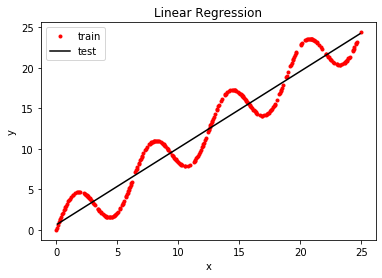

In [60]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

##  multinomial_basis

(300,)
(200,)
(10, 300, 1)
(300, 10)
(10, 300, 1)
(300, 10)
训练集预测值与真实值的标准差：1.5
(10, 200, 1)
(200, 10)
预测值与真实值的标准差：1.6


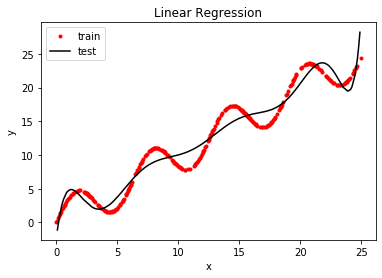

In [66]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train,basis_func=multinomial_basis)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

##  gaussian_basis

(300,)
(200,)
训练集预测值与真实值的标准差：0.4
预测值与真实值的标准差：0.4


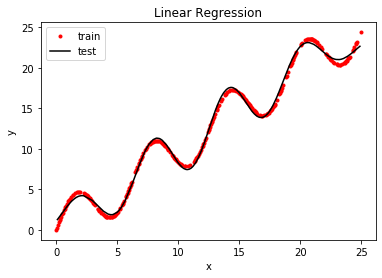

In [68]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train,basis_func=gaussian_basis)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)
$$ w^{*}= (x^{T}*x)*（x^{T}*y） $$

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [225]:
def main2(x_train, y_train,basis_func= identity_basis):
    """
    训练模型，并返回从x到y的映射。
    
    """
#     basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 最小二乘法 和书上相反！！！！
#     w=np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,y_train))
    # 梯度下降
    learning_rate=1e-4
    epoch=500
    w=np.random.randn(phi.shape[1])
    print(w.shape)
    print(phi1.shape[1])
    for i in range(epoch):
#         loss=np.mean((phi.T*(y_train-np.dot(phi,w))),axis=1)
        y_pred=np.dot(phi,w)
        loss=np.square(y_pred-y_train).sum()
        grad_w=2.0*(y_pred-y_train)
        w-=learning_rate*(np.dot(grad_w,phi)/len(phi))
        print('epoch:',i,"loss:",loss)
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        pass

    return f

##  identity_basis

(300,)
(200,)
(2,)
1
epoch: 0 loss: 46103.65872212508
epoch: 1 loss: 42635.96559531161
epoch: 2 loss: 39436.50652894811
epoch: 3 loss: 36484.53298494102
epoch: 4 loss: 33760.90137362395
epoch: 5 loss: 31247.948907206148
epoch: 6 loss: 28929.37905624994
epoch: 7 loss: 26790.155866360168
epoch: 8 loss: 24816.406449727336
epoch: 9 loss: 22995.33101918015
epoch: 10 loss: 21315.11988131664
epoch: 11 loss: 19764.876850412613
epoch: 12 loss: 18334.548586445162
epoch: 13 loss: 17014.859398986977
epoch: 14 loss: 15797.251094173409
epoch: 15 loss: 14673.827474648706
epoch: 16 loss: 13637.303132572471
epoch: 17 loss: 12680.956203608082
epoch: 18 loss: 11798.584775501582
epoch: 19 loss: 10984.466668560075
epoch: 20 loss: 10233.322327205036
epoch: 21 loss: 9540.28058195164
epoch: 22 loss: 8900.847059779831
epoch: 23 loss: 8310.875038037862
epoch: 24 loss: 7766.53855286517
epoch: 25 loss: 7264.307587742282
epoch: 26 loss: 6800.925181264996
epoch: 27 loss: 6373.386305686303
epoch: 28 loss: 5978.91837

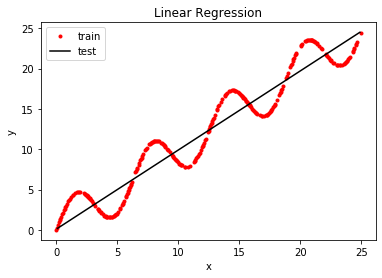

In [210]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main2(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

##  multinomial_basis

In [294]:
def main2(x_train, y_train,basis_func= identity_basis):
    """
    训练模型，并返回从x到y的映射。
    
    """
#     basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 最小二乘法 和书上相反！！！！
#     w=np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,y_train))
    # 梯度下降
    learning_rate=1
    epoch=10000
    w=np.random.randn(phi.shape[1])
    print(w.shape)
    print(phi.shape[1])
    old_grad=0
    lr_w=0
    for i in range(epoch):
        w_grad=0.0
        for n in range(len(phi)):
            w_grad=w_grad-2.0*(y_train[n]-w*phi[n])*phi[n]
        lr_w=lr_w+w_grad**2
        w=w-learning_rate/np.sqrt(lr_w)*w_grad
        loss=np.square(np.dot(phi,w)-y_train).sum()
#         print('loss',loss)
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        pass

    return f

(300,)
(200,)
(10, 300, 1)
(300, 10)
(11,)
11
(10, 300, 1)
(300, 10)
训练集预测值与真实值的标准差：100.5
(10, 200, 1)
(200, 10)
预测值与真实值的标准差：113.6


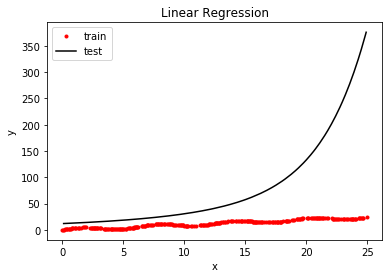

In [295]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main2(x_train, y_train,basis_func=multinomial_basis)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

##  gaussian_basis

In [291]:
def main2(x_train, y_train,basis_func= identity_basis):
    """
    训练模型，并返回从x到y的映射。
    
    """
#     basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1)
    phi1 = basis_func(x_train)
    phi = np.concatenate([phi0, phi1], axis=1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 最小二乘法 和书上相反！！！！
#     w=np.dot(np.linalg.inv(np.dot(phi.T,phi)),np.dot(phi.T,y_train))
    # 梯度下降
    learning_rate=1e-1
    epoch=100000
    w=np.random.randn(phi.shape[1])
    print(w.shape)
    print(phi1.shape[1])
    old_grad=0
    for i in range(epoch):
#         loss=np.mean((phi.T*(y_train-np.dot(phi,w))),axis=1)
        y_pred=np.dot(phi,w)
        loss=np.square(y_pred-y_train).sum()
        grad_w=2.0*(y_pred-y_train)
        w-=learning_rate*(np.dot(grad_w,phi)/len(phi))
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y
        pass

    return f

(300,)
(200,)
(11,)
10
训练集预测值与真实值的标准差：0.4
预测值与真实值的标准差：0.4


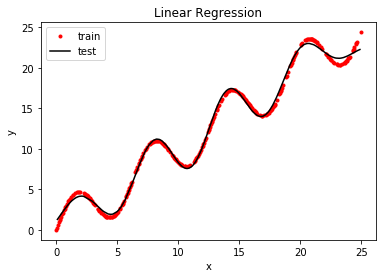

In [292]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main2(x_train, y_train,basis_func=gaussian_basis)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()